<a href="https://colab.research.google.com/github/Jereshea-JM/C-/blob/main/DigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2 # to load images
import tensorflow as tf
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.mnist #dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1) #scaling btw 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
X_train = x_train.reshape(-1,28,28,1) #width=28, height=28, no.of.channels=1(grayscale img), dimension=-1(dynamically calculated)
X_test = x_test.reshape(-1,28,28,1)
Y_train_value = y_train 
Y_train = to_categorical(y_train, num_classes = 10) #final layer in training contains number ranging btw 0 to 9 hence assigning num_classes=10
Y_test_value = y_test 
Y_test = to_categorical(y_test, num_classes = 10) #final layer in testing contains number ranging btw 0 to 9 hence assigning num_classes=10

In [ ]:
#ImageDataGenerator=> Data Augmentation
from keras.callbacks import ReduceLROnPlateau
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=False,
        vertical_flip=False)
#to reduce the learning rate
annealer = ReduceLROnPlateau(monitor='val_accuracy', patience=1, verbose=2, factor=0.5, min_lr=0.0000001) #patience=2

In [ ]:
# Callback for stop training after threshold accuracy
ACCURACY_THRESHOLD = 0.99
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, stopping training!"%(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True
            
callbacks = CustomCallback()

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1)

# Set a learning rate
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [ ]:
model = tf.keras.models.Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Valid', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='Valid', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(519, activation="relu")) 
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))


In [ ]:
optimizer = Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 10
batch_size = 64

In [ ]:
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,Y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[annealer])

Epoch 1/10


<ipython-input-43-777f911bc7a9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),


937/937 [==============================] - 218s 232ms/step - loss: 0.3326 - accuracy: 0.8918 - val_loss: 0.0381 - val_accuracy: 0.9874 - lr: 0.0010
Epoch 2/10
937/937 [==============================] - 203s 216ms/step - loss: 0.0983 - accuracy: 0.9699 - val_loss: 0.0326 - val_accuracy: 0.9896 - lr: 9.0000e-04
Epoch 3/10
937/937 [==============================] - 198s 212ms/step - loss: 0.0717 - accuracy: 0.9791 - val_loss: 0.0250 - val_accuracy: 0.9927 - lr: 8.1000e-04
Epoch 4/10
937/937 [==============================] - 201s 214ms/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0199 - val_accuracy: 0.9934 - lr: 7.2900e-04
Epoch 5/10
937/937 [==============================] - 199s 212ms/step - loss: 0.0520 - accuracy: 0.9845 - val_loss: 0.0178 - val_accuracy: 0.9940 - lr: 6.5610e-04
Epoch 6/10
937/937 [==============================] - 202s 215ms/step - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.0173 - val_accuracy: 0.9944 - lr: 5.9049e-04
Epoch 7/10
937/937 [=================

In [ ]:
# Save the model
model.save('digit_classification.model')

In [ ]:
new_model = tf.keras.models.load_model('digit_classification.model')

try
1/1 [==============================] - 0s 95ms/step
The predicted digit is 1


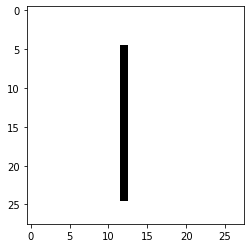

1/1 [==============================] - 0s 22ms/step
The predicted digit is 3


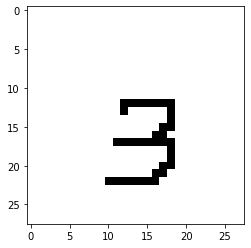

1/1 [==============================] - 0s 36ms/step
The predicted digit is 4


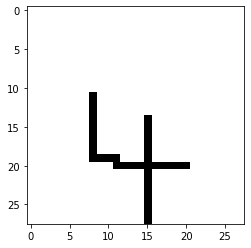

1/1 [==============================] - 0s 52ms/step
The predicted digit is 3


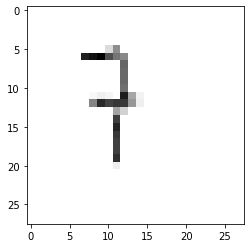

1/1 [==============================] - 0s 30ms/step
The predicted digit is 5


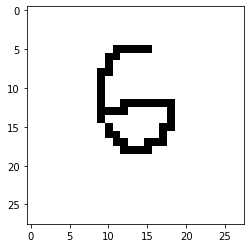

1/1 [==============================] - 0s 53ms/step
The predicted digit is 2


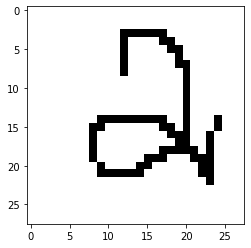

1/1 [==============================] - 0s 30ms/step
The predicted digit is 5


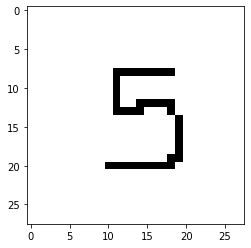

1/1 [==============================] - 0s 31ms/step
The predicted digit is 8


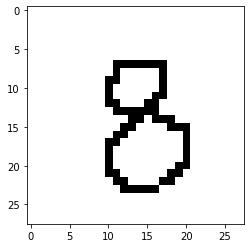

1/1 [==============================] - 0s 79ms/step
The predicted digit is 9


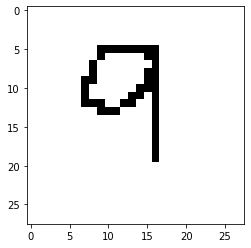

In [ ]:
image_number=1
print("try")
i=1
while os.path.isfile(f"/content/classify_digit_conv.model/Digits/digit{image_number}.png"):
  try:
    img=cv2.imread(f"/content/classify_digit_conv.model/Digits/digit{image_number}.png")[:,:,0]
    img=np.invert(np.array([img]))
    prediction=model.predict(img)
    print(f"The predicted digit is {np.argmax(prediction)}") # np.argmax=>gives the index of the number which has the highest number
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    image_number+=1